In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD # Use TruncatedSVD for sparse data
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# Load the dataset
df = pd.read_csv('/content/cleaned_dataset.csv')

# Display the first few rows to verify
print("Original DataFrame:")
print(df.head())
 # Use the 'tweet' column for text data
X = df['tweet']
# Use the 'class' column for labels
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Original DataFrame:
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  \
0  retweet as a woman you should not complain abo...   
1  retweet boy dats coldtyga down bad for cuffin ...   
2  retweet dawg retweet you ever fuck a bitch and...   
3                     retweet she look like a tranny   
4  retweet the shit you hear about me might be tr...   

                                        tweet_tokens  
0  ['retweet', 'woman', 'complain', 'cleaning', '...  
1  ['retweet', 'boy', 'dat', 'coldtyga', 'bad', '...  
2  ['retweet', 'dawg', 'retweet', 'ever

## **TF - IDF** **Vectorization**




In [3]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
X_train = X_train.fillna('')  # Replace NaN with empty strings
X_test = X_test.fillna('')
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


##  **Model Traning  using Random Forest Model**

In [4]:

from sklearn.ensemble import RandomForestClassifier

# Random Forest Pipeline
pipeline_rf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train and evaluate the model
pipeline_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = pipeline_rf.predict(X_test_tfidf)

print("TF-IDF Encoding with Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_rf)
classification_report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


TF-IDF Encoding with Random Forest
Accuracy: 0.8664514827516643
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.34      0.35       286
           1       0.93      0.91      0.92      3838
           2       0.76      0.83      0.79       833

    accuracy                           0.87      4957
   macro avg       0.69      0.69      0.69      4957
weighted avg       0.87      0.87      0.87      4957

Accuracy: 0.8664514827516643
Precision: 0.8659360461492431
Recall: 0.8664514827516643
F1 Score: 0.8657955254828112


Confusion Matrix:
 [[  96  158   32]
 [ 143 3505  190]
 [  17  122  694]]


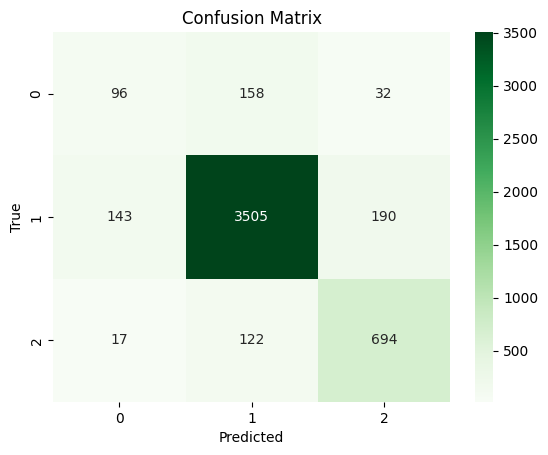

In [5]:


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## **Model Traning Using Naive Bayes Model**

In [6]:

# Naive Bayes Pipeline

pipeline_tfidf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', MultinomialNB())
])

# Train and evaluate the model
pipeline_tfidf.fit(X_train_resampled, y_train_resampled)
y_pred_tfidf = pipeline_tfidf.predict(X_test_tfidf)

print("TF-IDF Encoding with Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_tfidf)
classification_report_dict = classification_report(y_test, y_pred_tfidf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

TF-IDF Encoding with Naive Bayes
Accuracy: 0.6913455719184991
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.52      0.23       286
           1       0.92      0.71      0.80      3838
           2       0.59      0.66      0.62       833

    accuracy                           0.69      4957
   macro avg       0.55      0.63      0.55      4957
weighted avg       0.82      0.69      0.74      4957

Accuracy: 0.6913455719184991
Precision: 0.8155434871987539
Recall: 0.6913455719184991
F1 Score: 0.7367834876329789


Confusion Matrix:
 [[ 150  100   36]
 [ 762 2724  352]
 [ 127  153  553]]


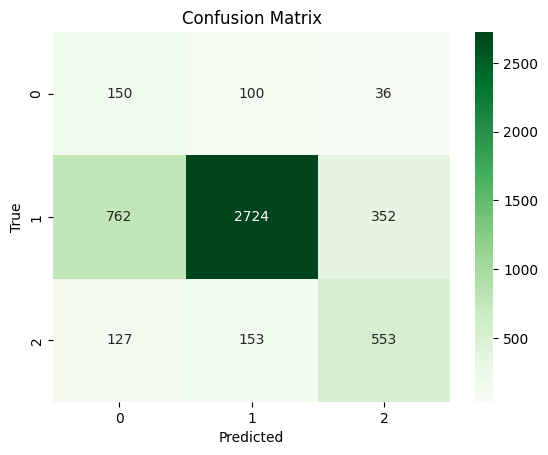

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
  # Logistic Regression Pipeline
pipeline_tfidf = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler does not support sparse matrix if with_mean=True
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train and evaluate the model
pipeline_tfidf.fit(X_train_resampled, y_train_resampled)
y_pred_tfidf = pipeline_tfidf.predict(X_test_tfidf)

print("TF-IDF Encoding with Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))

# Extracting metrics separately
accuracy = accuracy_score(y_test, y_pred_tfidf)
classification_report_dict = classification_report(y_test, y_pred_tfidf, output_dict=True)
precision = classification_report_dict['weighted avg']['precision']
recall = classification_report_dict['weighted avg']['recall']
f1_score = classification_report_dict['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


TF-IDF Encoding with Logistic Regression
Accuracy: 0.8240871494855759
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.44      0.30       286
           1       0.94      0.86      0.90      3838
           2       0.76      0.80      0.78       833

    accuracy                           0.82      4957
   macro avg       0.64      0.70      0.66      4957
weighted avg       0.86      0.82      0.84      4957

Accuracy: 0.8240871494855759
Precision: 0.8648590924093248
Recall: 0.8240871494855759
F1 Score: 0.8410798914582188


Confusion Matrix:
 [[ 126  134   26]
 [ 355 3295  188]
 [  78   91  664]]


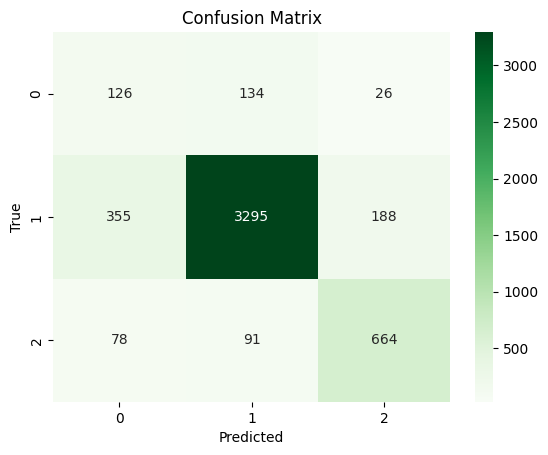

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Conclusion :**  
*    **Random Forest** Model we are getting accuracy of **86%** which is highest among other models.

*  **Naive Beyes** model which getting **69%** accuracy.

*  **Logistic Regression** which getting **82%** of accuracy in Hate Speech Detection from Tweets on Tweeter platform.  







